# pandas - associations

**abalone** has 7 float features, and 1 integer (=age) feature column. But age is treated as continuous or categorical depending on how you frame the problem.

a. Take as continuous, predict a number, then round it,
b. Take as categorical, _which changes statistical tests you are about to apply_,

to understand relations, below statistical tests available
```
                        categorical         |  continuous
         categorical    chi-square          |  T-test or ANOVA
         continuous     logistic-regression |  correlation (heatmap)
```

- all features have `c0.5 correlation` w/ age
- some features are `>0.9 correlation` with other features (multicolinearity risk if regression applied!)
- depending on the model, scaling may need

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

abaloneFile = "./dataset/abalone.parquet"
abaloneStandardizedMinMaxFile =  "./dataset/abaloneStandardizedMinMax.parquet"
abaloneStandardizedFile =  "./dataset/abaloneStandardized.parquet"

In [13]:
# so we need 2 type of data frames
# age is int
# age is category

dfAbalone = pd.read_parquet(abaloneFile)
dfAbaloneCategorized = dfAbalone.astype({"age" : "category"},
                                        copy=True)

print(dfAbalone.age.info())
print(dfAbaloneCategorized.age.info())

<class 'pandas.core.series.Series'>
RangeIndex: 3320 entries, 0 to 3319
Series name: age
Non-Null Count  Dtype
--------------  -----
3320 non-null   int64
dtypes: int64(1)
memory usage: 26.1 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 3320 entries, 0 to 3319
Series name: age
Non-Null Count  Dtype   
--------------  -----   
3320 non-null   category
dtypes: category(1)
memory usage: 4.6 KB
None


<Axes: >

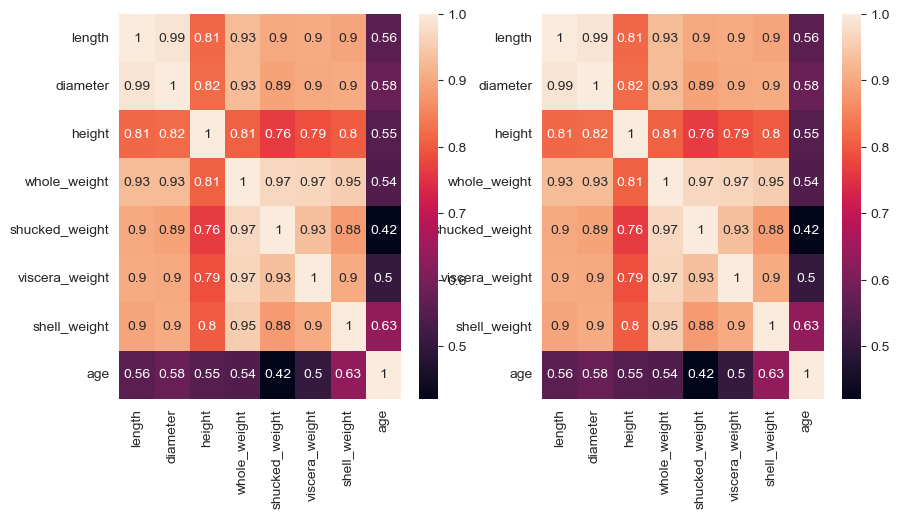

In [35]:
# in every case, pandas calculates a correlation as age is still stored as numerical !

fig, ax = plt.subplots( nrows=1, ncols=2, figsize= (10, 5))

sns.heatmap(data= dfAbalone.corr(), annot=True, ax= ax[0])
sns.heatmap(data= dfAbaloneCategorized.corr(), annot=True, ax=ax[1])
